In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
import pandas as pd

file_path = '/content/Time_Series_Ronti_Lake2.csv'
data = pd.read_csv(file_path)

In [ ]:
data.head(), data.columns, data.isnull().sum()

(  system:index    ET  LST_Day_1km  Snow_Albedo        date  \
 0   2010_01_01  45.0        -4.03         14.0  2010-01-01   
 1   2010_01_02   NaN          NaN         48.0  2010-01-02   
 2   2010_01_03   NaN          NaN          NaN  2010-01-03   
 3   2010_01_04   NaN        -4.57        100.0  2010-01-04   
 4   2010_01_05   NaN        -5.95         41.0  2010-01-05   
 
                                      .geo  
 0  {"type":"MultiPoint","coordinates":[]}  
 1  {"type":"MultiPoint","coordinates":[]}  
 2  {"type":"MultiPoint","coordinates":[]}  
 3  {"type":"MultiPoint","coordinates":[]}  
 4  {"type":"MultiPoint","coordinates":[]}  ,
 Index(['system:index', 'ET', 'LST_Day_1km', 'Snow_Albedo', 'date', '.geo'], dtype='object'),
 system:index       0
 ET              4450
 LST_Day_1km     2165
 Snow_Albedo     3701
 date               0
 .geo               0
 dtype: int64)

In [ ]:
data['date'] = pd.to_datetime(data['date'])




In [ ]:
data_filled = data.sort_values(by='date').reset_index(drop=True)

In [ ]:

data_filled.set_index('date', inplace=True)

data_filled['ET'] = data_filled['ET'].interpolate(method='spline', order=3)

data_filled['Snow_Albedo'] = data_filled['Snow_Albedo'].interpolate(method='spline', order=5)

data_filled['LST_Day_1km'] = data_filled['LST_Day_1km'].interpolate(method='spline', order=5)


In [ ]:
# Reset the index to bring 'date' back as a column
data_filled.reset_index(inplace=True)

In [ ]:
data_filled = data_filled.drop(columns=['system:index', '.geo'])

data_filled.head(), data_filled.isnull().sum()

(        date         ET  LST_Day_1km  Snow_Albedo
 0 2010-01-01  45.000000    -4.030000    14.000000
 1 2010-01-02  41.718265   255.520903    48.000000
 2 2010-01-03  39.929319    93.338732    93.328015
 3 2010-01-04  39.480650    -4.570000   100.000000
 4 2010-01-05  40.219391    -5.950000    41.000000,
 date           0
 ET             0
 LST_Day_1km    0
 Snow_Albedo    0
 dtype: int64)

In [ ]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data_filled[['ET', 'LST_Day_1km', 'Snow_Albedo']])

# Define a function to create sequences for time series forecasting
def create_sequences(data, time_steps=30):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

# Create sequences with a 30-day window for one-month prediction
time_steps = 30
X, y = create_sequences(scaled_data, time_steps)

split_idx = int(0.8 * len(X))
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

model = Sequential([
    LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    LSTM(32),
    Dense(16, activation='relu'),
    Dense(X_train.shape[2])
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, shuffle=False)

test_loss = model.evaluate(X_test, y_test)
test_loss

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


102/102 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0516 - val_loss: 0.0059
Epoch 2/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0093 - val_loss: 0.0055
Epoch 3/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0071 - val_loss: 0.0054
Epoch 4/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0055 - val_loss: 0.0045
Epoch 5/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 6s 35ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 6/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0028 - val_loss: 0.0035
Epoch 7/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 8/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 9/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 0.0018 - val_loss: 0.0023
Epoch 10/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0018 - val_loss: 0.0021
Epoch 11/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0017 - val_loss: 0.0023
Epoch 12/50
102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/ste

0.0004766614001709968

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score




*   Test MSE (Mean Squared Error): 0.0004766614001709968
This is quite low, which is good. MSE measures the average squared difference between predicted and actual values.
*   Test RMSE (Root Mean Squared Error): 0.021832576581132076   
RMSE is the square root of MSE and is in the same units as your target variable. This value is also relatively low, indicating good performance.
*The R-squared value of approximately 0.696 means that about 69.6% of the variance in the target variable is predictable from the input features.
This is a moderately strong result. In many real-world scenarios, an R-squared value above 0.6 is considered good, especially for time series prediction which can be challenging.




In [ ]:
y_pred = model.predict(X_test)

rmse = np.sqrt(test_loss)

r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {test_loss}")
print(f"Test RMSE: {rmse}")
print(f"R-squared: {r2}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Test MSE: 0.0004766614001709968
Test RMSE: 0.021832576581132076
R-squared: 0.6956770828843649


In [ ]:
last_sequence = X_test[-1]
predicted_values = []

for _ in range(30):
    next_pred = model.predict(last_sequence[np.newaxis, :, :])[0]
    predicted_values.append(next_pred)
    last_sequence = np.vstack([last_sequence[1:], next_pred])

# Inverse transform to get the actual values
predicted_values = scaler.inverse_transform(predicted_values)

predicted_df = pd.DataFrame(predicted_values, columns=['ET', 'LST_Day_1km', 'Snow_Albedo'])
predicted_df['date'] = pd.date_range(start=data_filled['date'].iloc[-1] + pd.Timedelta(days=1), periods=30)

print(predicted_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━

In [ ]:
historical_mean = data_filled[['ET', 'LST_Day_1km', 'Snow_Albedo']].mean()
historical_std = data_filled[['ET', 'LST_Day_1km', 'Snow_Albedo']].std()



In [ ]:
def identify_abnormalities(predicted_df, historical_mean, historical_std, threshold=2):
    abnormalities = (np.abs(predicted_df[['ET', 'LST_Day_1km', 'Snow_Albedo']] - historical_mean)
                     > threshold * historical_std)
    return abnormalities

abnormalities = identify_abnormalities(predicted_df, historical_mean, historical_std)
print(abnormalities)

       ET  LST_Day_1km  Snow_Albedo
0   False        False        False
1   False        False        False
2   False        False        False
3   False        False        False
4   False        False        False
5   False        False        False
6   False        False        False
7   False        False        False
8   False        False        False
9   False        False        False
10  False        False         True
11  False        False         True
12  False        False         True
13  False        False         True
14  False        False         True
15  False        False         True
16  False        False         True
17  False        False         True
18  False        False         True
19  False        False         True
20  False        False         True
21  False        False         True
22  False        False         True
23  False        False         True
24  False        False         True
25  False        False         True
26  False        False      

In [ ]:
def trigger_warning(abnormalities, warning_threshold=5):
    warning_days = abnormalities.sum(axis=1) >= warning_threshold
    return warning_days

warnings = trigger_warning(abnormalities)
predicted_df['warning'] = warnings
print(predicted_df[['date', 'warning']])


         date  warning
0  2023-12-31    False
1  2024-01-01    False
2  2024-01-02    False
3  2024-01-03    False
4  2024-01-04    False
5  2024-01-05    False
6  2024-01-06    False
7  2024-01-07    False
8  2024-01-08    False
9  2024-01-09    False
10 2024-01-10    False
11 2024-01-11    False
12 2024-01-12    False
13 2024-01-13    False
14 2024-01-14    False
15 2024-01-15    False
16 2024-01-16    False
17 2024-01-17    False
18 2024-01-18    False
19 2024-01-19    False
20 2024-01-20    False
21 2024-01-21    False
22 2024-01-22    False
23 2024-01-23    False
24 2024-01-24    False
25 2024-01-25    False
26 2024-01-26    False
27 2024-01-27    False
28 2024-01-28    False
29 2024-01-29    False


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
filtered_data = data_filled[data_filled['date'] >= '2020-01-01']


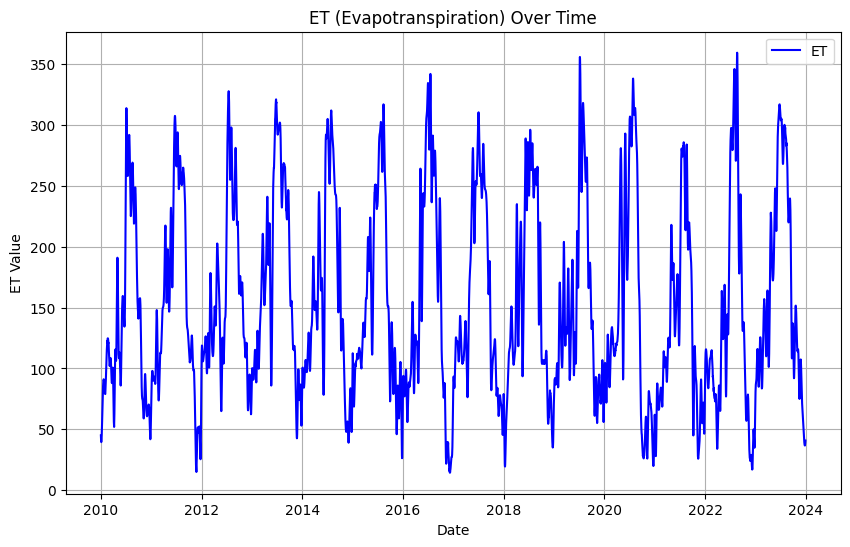

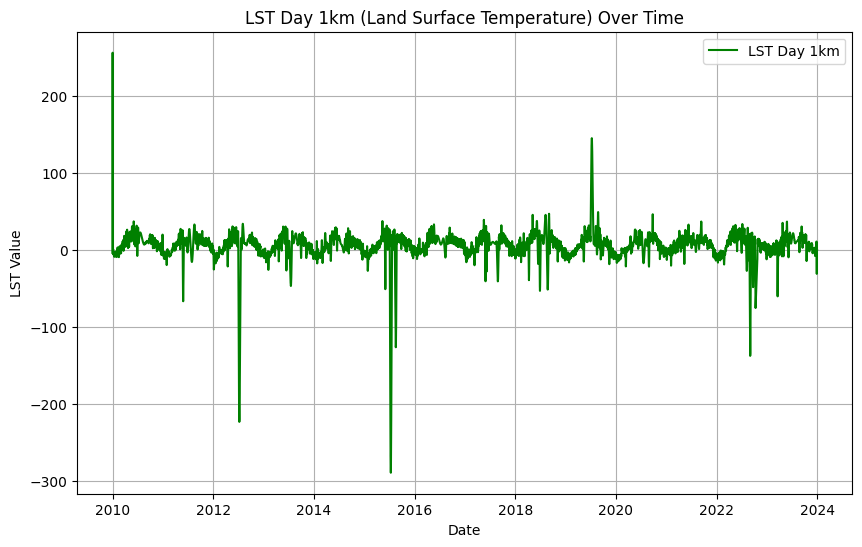

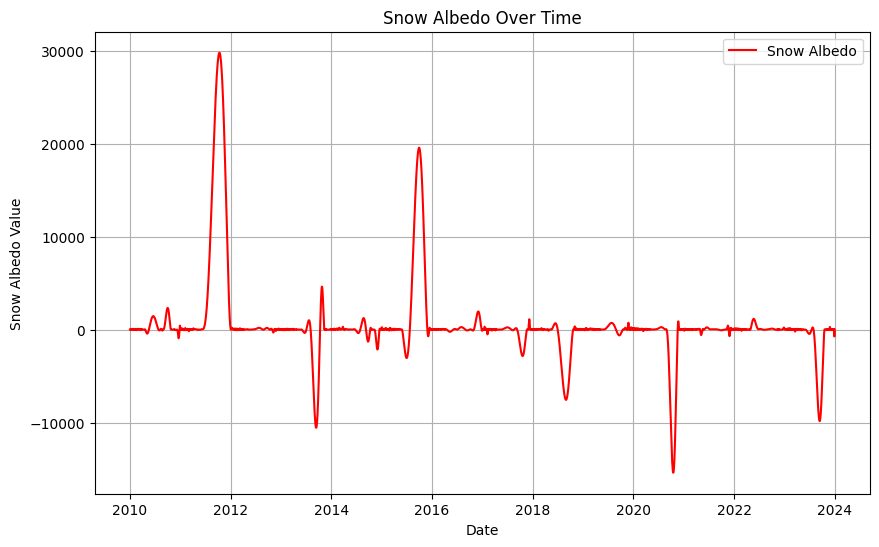

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_filled['date'], data_filled['ET'], color='blue', label='ET')
plt.title('ET (Evapotranspiration) Over Time')
plt.xlabel('Date')
plt.ylabel('ET Value')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_filled['date'], data_filled['LST_Day_1km'], color='green', label='LST Day 1km')
plt.title('LST Day 1km (Land Surface Temperature) Over Time')
plt.xlabel('Date')
plt.ylabel('LST Value')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data_filled['date'], data_filled['Snow_Albedo'], color='red', label='Snow Albedo')
plt.title('Snow Albedo Over Time')
plt.xlabel('Date')
plt.ylabel('Snow Albedo Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
filtered_data = data_filled[data_filled['date'] >= '2020-01-01']


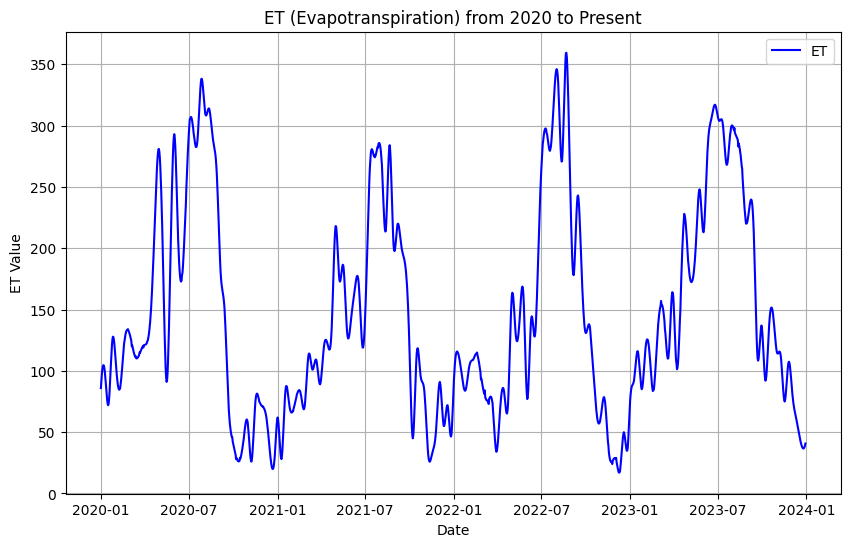

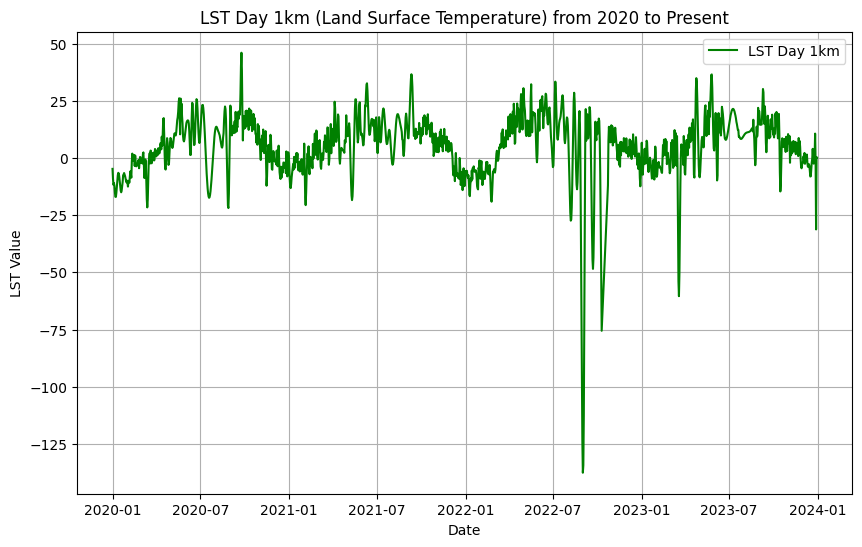

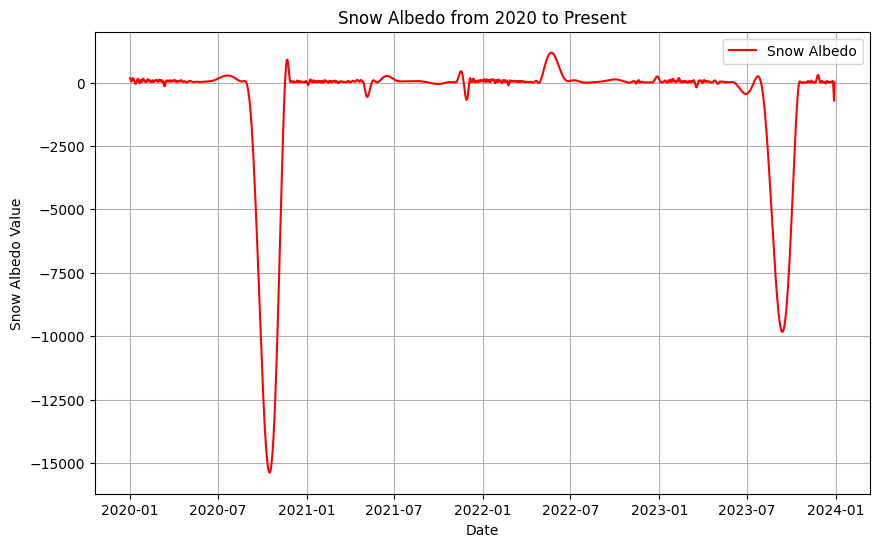

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['ET'], color='blue', label='ET')
plt.title('ET (Evapotranspiration) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('ET Value')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['LST_Day_1km'], color='green', label='LST Day 1km')
plt.title('LST Day 1km (Land Surface Temperature) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('LST Value')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(filtered_data['date'], filtered_data['Snow_Albedo'], color='red', label='Snow Albedo')
plt.title('Snow Albedo from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Snow Albedo Value')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
columns_to_scale = ['ET', 'LST_Day_1km', 'Snow_Albedo']

scaler = MinMaxScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(filtered_data[columns_to_scale]),
                           columns=columns_to_scale)

scaled_data['date'] = filtered_data['date'].reset_index(drop=True)

In [ ]:
highlight_ranges = [
    ('2021-01-20', '2021-02-07')]

In [ ]:
mean_values = scaled_data[columns_to_scale].mean(axis=0)
std_dev_values = scaled_data[columns_to_scale].std(axis=0)


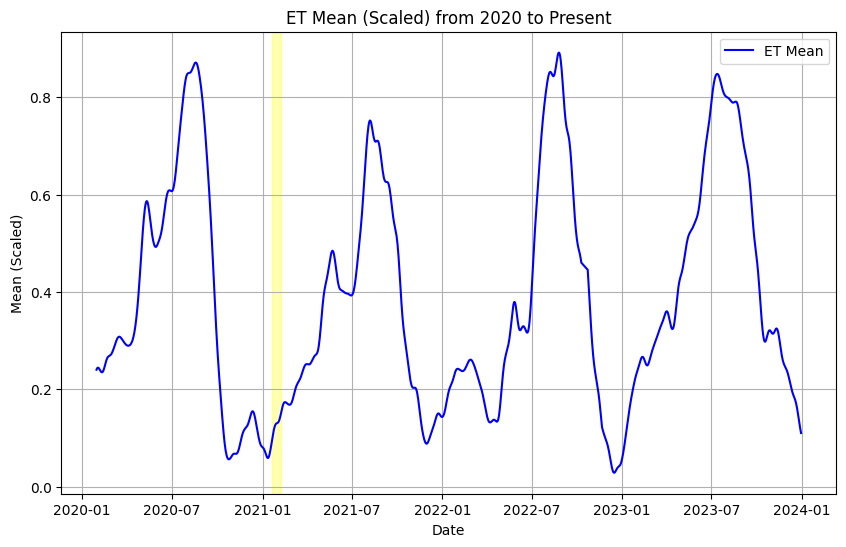

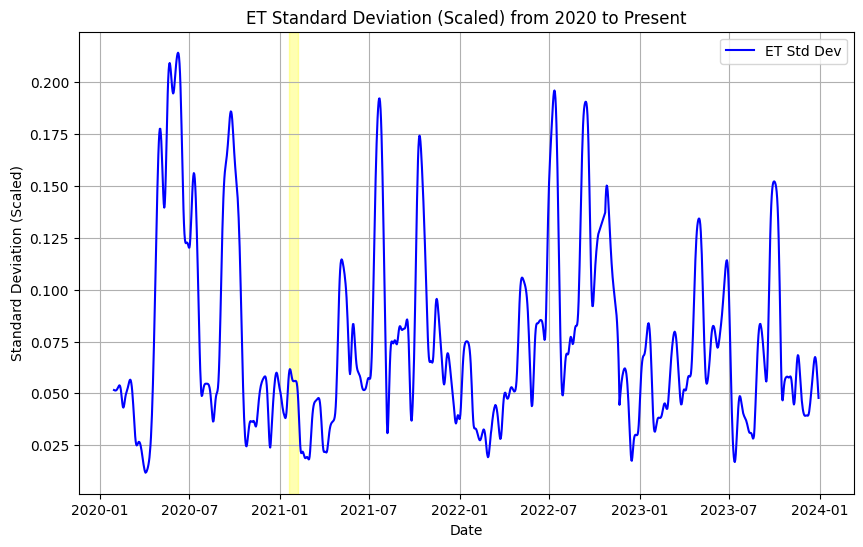

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['ET'].rolling(window=30).mean(), label='ET Mean', color='blue')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('ET Mean (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Mean (Scaled)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['ET'].rolling(window=30).std(), label='ET Std Dev', color='blue')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('ET Standard Deviation (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (Scaled)')
plt.grid(True)
plt.legend()
plt.show()


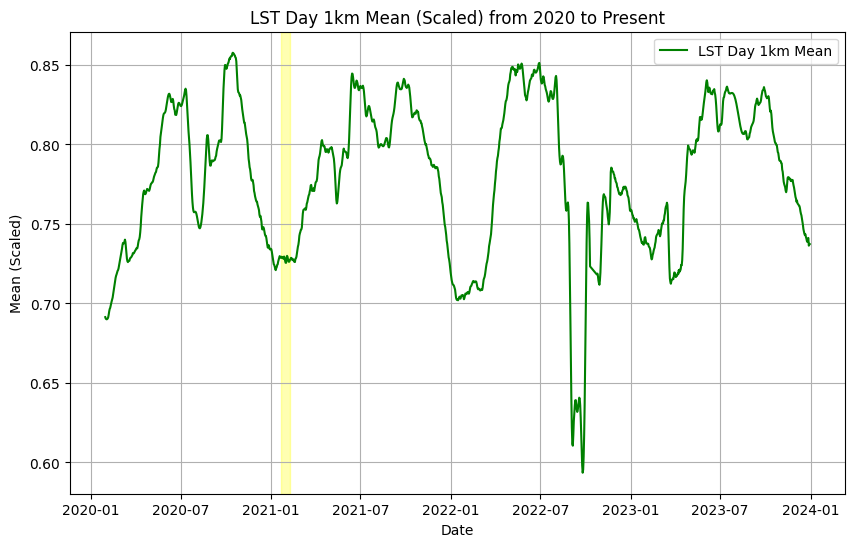

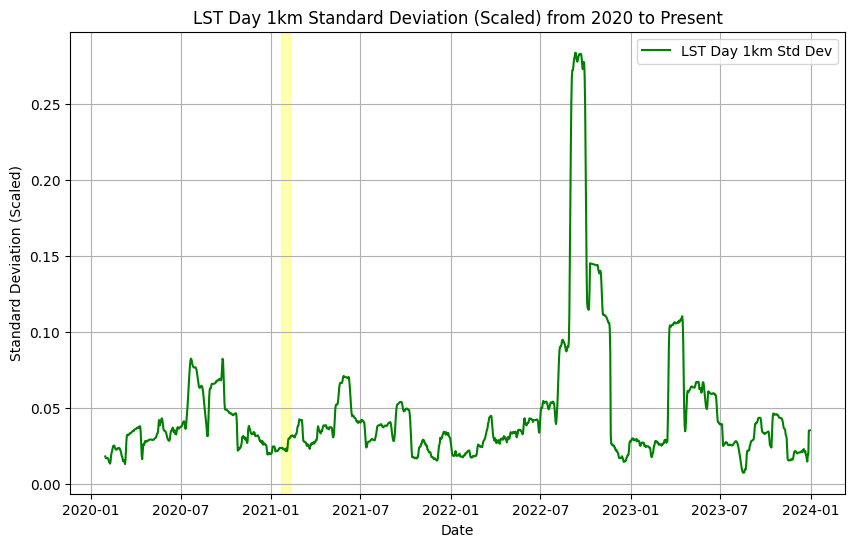

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['LST_Day_1km'].rolling(window=30).mean(), label='LST Day 1km Mean', color='green')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('LST Day 1km Mean (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Mean (Scaled)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['LST_Day_1km'].rolling(window=30).std(), label='LST Day 1km Std Dev', color='green')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('LST Day 1km Standard Deviation (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (Scaled)')
plt.grid(True)
plt.legend()
plt.show()

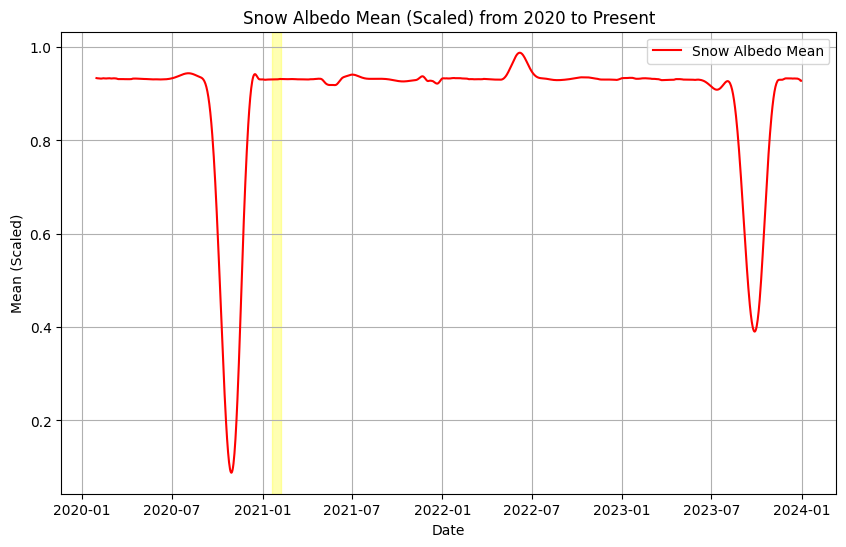

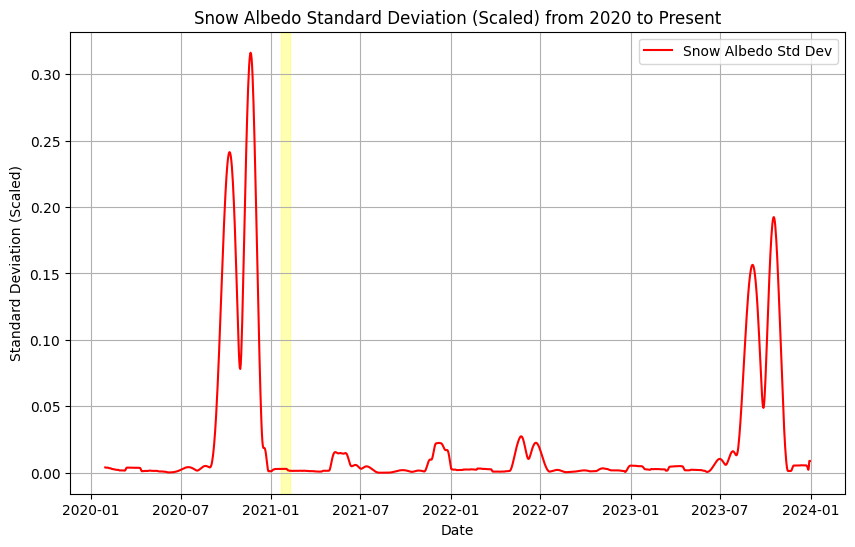

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['Snow_Albedo'].rolling(window=30).mean(), label='Snow Albedo Mean', color='red')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('Snow Albedo Mean (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Mean (Scaled)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(scaled_data['date'], scaled_data['Snow_Albedo'].rolling(window=30).std(), label='Snow Albedo Std Dev', color='red')
for start_date, end_date in highlight_ranges:
    plt.axvspan(pd.to_datetime(start_date), pd.to_datetime(end_date), color='yellow', alpha=0.3)
plt.title('Snow Albedo Standard Deviation (Scaled) from 2020 to Present')
plt.xlabel('Date')
plt.ylabel('Standard Deviation (Scaled)')
plt.grid(True)
plt.legend()
plt.show()
